# Notes from manual analysis 4/08/2022
1. 1091 Fasted has a huge outlier sample, with highly elevated quants.
    - Typically 
2. 1060 random also has an outlier sample, but not as outlier-y as 1091 F

3. There's a trend in a few metabolites where the average metab quant for 1091 , 1092, 1093, 1101, 1102 (both fasted and random samples) is consistently higher than the samples from 1060, 1062, 1074, 1076, 1082 
    - There's another trend where the same 5 {1091, 1092, 1093, 1101, 1102} have very little variance between their Random and Fasted, while the other 5 show big variance. 

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
# Takes forever to read the entire excel document 
# because pandas is trying to parse the nested file structure
# df = pd.read_excel(r'..\data\processed\CD33_metabs.xlsx')
# df

In [139]:
df = pd.read_csv(r'..\data\processed\CD33_metabs_manual_curated.csv')
# Filter rows for only Compounds table
df = df.loc[df[df.columns[0]].notna()]

cols = df.columns
pr_cols = df.filter(regex='Peak Rating')  # pr == Peak Rating 
pr_sample_cols = pr_cols.filter(regex='BG').columns
pr_sample_cols
rawfile_cols = df.filter(regex='Group Area').columns
sample_cols = df.filter(regex='Group Area').filter(regex='BG').columns

df.loc[:, rawfile_cols] = np.log2(df.loc[:, rawfile_cols].astype('float'))  # Log2 transform data

# During manual curation, BAD features were CHECKED == TRUE.
# So GOOD FEATURES have CHECKED == FALSE
df[df['Checked'] == 'FALSE']

,Group Area: 20210831_KAO_HILIC_T112M_20210330_8wk_RBG,Group Area: 20210831_KAO_HILIC_T193M20210406_9wk_RBG,Group Area: 20210831_KAO_HILIC_T1060M_20210322_8wk_FBG,Group Area: 20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,Group Area: 20210831_KAO_HILIC_T1060M_20210329_9wk_FBG,Group Area: 20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,Group Area: 20210831_KAO_HILIC_T1060M_20210405_10wk_FBG,Group Area: 20210831_KAO_HILIC_T1060M_20210408_10wk_RBG,Group Area: 20210831_KAO_HILIC_T1062M_20210322_8wk_FBG,Group Area: 20210831_KAO_HILIC_T1062M_20210325_8wk_RBG,...,Peak Rating: 20210831_KAO_HILIC_T1101M_20210406_9wk_RBG.raw (F61),Peak Rating: 20210831_KAO_HILIC_T1101M_20210410_10wk_FBG.raw (F62),Peak Rating: 20210831_KAO_HILIC_T1101M_20210413_10wk_RBG.raw (F63),Peak Rating: 20210831_KAO_HILIC_T1102M_20210327_8wk_FBG.raw (F64),Peak Rating: 20210831_KAO_HILIC_T1102M_20210402_9wk_FBG.raw (F65),Peak Rating: 20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw (F66),Peak Rating: 20210831_KAO_HILIC_T1102M_20210410_10wk_FBG.raw (F67),Peak Rating: 20210831_KAO_HILIC_T1102M_20210413_10wk_RBG.raw (F68),Unnamed: 149,Unnamed: 150
176,30.624453,30.644187,30.560702,30.610134,30.606110,30.996475,29.787913,30.636811,30.572489,30.636650,...,NaN,NaN,6.2,NaN,6.2,NaN,5.7,NaN,NaN,NaN
313,29.689560,29.774822,29.945500,29.309067,30.082627,29.431175,30.096643,29.270487,30.703658,30.109212,...,8.4,9.5,9.5,10,8.9,9.5,8.4,7.8,NaN,NaN
501,29.931633,29.942531,29.528341,29.827946,29.599444,30.018239,29.253402,29.673409,29.569621,30.189935,...,8.9,8.4,7.8,8.4,8.4,7.8,8.4,8.4,NaN,NaN
698,28.978826,29.128997,29.839308,28.459047,30.235353,28.625995,30.252208,28.265490,30.641931,29.492769,...,8.9,8.4,9.5,9.5,9.5,9.5,7.8,7.8,NaN,NaN
898,24.596731,26.201371,17.148994,17.431244,19.169210,26.312933,27.209158,25.956118,21.774699,26.822243,...,9.5,8.4,8.4,NaN,8.9,7.8,8.9,8.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127732,19.698029,19.891287,17.763246,19.627882,19.473107,18.243526,19.477656,19.609624,19.345424,19.619823,...,6.8,0.3,NaN,0.3,NaN,6.8,0.3,6.8,NaN,NaN
127827,20.058637,19.564824,19.261637,19.559839,18.631130,20.407732,19.581830,19.719846,19.717326,19.575585,...,5.8,3.4,NaN,7.9,6.8,3,6.8,7.4,NaN,NaN
127925,17.444434,19.490645,19.101047,20.183049,19.537407,16.575568,18.931378,19.504332,19.888199,18.929660,...,NaN,NaN,NaN,7.9,0.3,7.9,7.4,NaN,NaN,NaN
127984,19.294282,18.659783,20.034384,19.589771,20.037159,19.774595,20.258819,18.942582,19.854122,18.940518,...,NaN,0.3,0.3,0.3,6.3,8.5,7.9,0.3,NaN,NaN


In [140]:
df

,Group Area: 20210831_KAO_HILIC_T112M_20210330_8wk_RBG,Group Area: 20210831_KAO_HILIC_T193M20210406_9wk_RBG,Group Area: 20210831_KAO_HILIC_T1060M_20210322_8wk_FBG,Group Area: 20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,Group Area: 20210831_KAO_HILIC_T1060M_20210329_9wk_FBG,Group Area: 20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,Group Area: 20210831_KAO_HILIC_T1060M_20210405_10wk_FBG,Group Area: 20210831_KAO_HILIC_T1060M_20210408_10wk_RBG,Group Area: 20210831_KAO_HILIC_T1062M_20210322_8wk_FBG,Group Area: 20210831_KAO_HILIC_T1062M_20210325_8wk_RBG,...,Peak Rating: 20210831_KAO_HILIC_T1101M_20210406_9wk_RBG.raw (F61),Peak Rating: 20210831_KAO_HILIC_T1101M_20210410_10wk_FBG.raw (F62),Peak Rating: 20210831_KAO_HILIC_T1101M_20210413_10wk_RBG.raw (F63),Peak Rating: 20210831_KAO_HILIC_T1102M_20210327_8wk_FBG.raw (F64),Peak Rating: 20210831_KAO_HILIC_T1102M_20210402_9wk_FBG.raw (F65),Peak Rating: 20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw (F66),Peak Rating: 20210831_KAO_HILIC_T1102M_20210410_10wk_FBG.raw (F67),Peak Rating: 20210831_KAO_HILIC_T1102M_20210413_10wk_RBG.raw (F68),Unnamed: 149,Unnamed: 150
0,31.265646,31.367784,31.408931,31.489706,31.415791,31.361736,31.416008,31.612634,31.445632,31.497140,...,1.3,4,5.1,4.6,6.7,6.2,NaN,4.6,NaN,NaN
176,30.624453,30.644187,30.560702,30.610134,30.606110,30.996475,29.787913,30.636811,30.572489,30.636650,...,NaN,NaN,6.2,NaN,6.2,NaN,5.7,NaN,NaN,NaN
313,29.689560,29.774822,29.945500,29.309067,30.082627,29.431175,30.096643,29.270487,30.703658,30.109212,...,8.4,9.5,9.5,10,8.9,9.5,8.4,7.8,NaN,NaN
501,29.931633,29.942531,29.528341,29.827946,29.599444,30.018239,29.253402,29.673409,29.569621,30.189935,...,8.9,8.4,7.8,8.4,8.4,7.8,8.4,8.4,NaN,NaN
698,28.978826,29.128997,29.839308,28.459047,30.235353,28.625995,30.252208,28.265490,30.641931,29.492769,...,8.9,8.4,9.5,9.5,9.5,9.5,7.8,7.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127732,19.698029,19.891287,17.763246,19.627882,19.473107,18.243526,19.477656,19.609624,19.345424,19.619823,...,6.8,0.3,NaN,0.3,NaN,6.8,0.3,6.8,NaN,NaN
127827,20.058637,19.564824,19.261637,19.559839,18.631130,20.407732,19.581830,19.719846,19.717326,19.575585,...,5.8,3.4,NaN,7.9,6.8,3,6.8,7.4,NaN,NaN
127925,17.444434,19.490645,19.101047,20.183049,19.537407,16.575568,18.931378,19.504332,19.888199,18.929660,...,NaN,NaN,NaN,7.9,0.3,7.9,7.4,NaN,NaN,NaN
127984,19.294282,18.659783,20.034384,19.589771,20.037159,19.774595,20.258819,18.942582,19.854122,18.940518,...,NaN,0.3,0.3,0.3,6.3,8.5,7.9,0.3,NaN,NaN


In [115]:
df = pd.read_csv(r'..\data\processed\CD33_metabs.csv')
df = df.loc[df['Checked'] == 'FALSE']
df

,Tags,Checked,Name,Formula,Annot. Source: Predicted Compositions,Annot. Source: mzCloud Search,Annot. Source: Metabolika Search,Annot. Source: ChemSpider Search,Annot. DeltaMass [ppm],Calc. MW,...,Peak Rating: 20210831_KAO_HILIC_T1101M_20210330_8wk_RBG.raw (F59),Peak Rating: 20210831_KAO_HILIC_T1101M_20210402_9wk_FBG.raw (F60),Peak Rating: 20210831_KAO_HILIC_T1101M_20210406_9wk_RBG.raw (F61),Peak Rating: 20210831_KAO_HILIC_T1101M_20210410_10wk_FBG.raw (F62),Peak Rating: 20210831_KAO_HILIC_T1101M_20210413_10wk_RBG.raw (F63),Peak Rating: 20210831_KAO_HILIC_T1102M_20210327_8wk_FBG.raw (F64),Peak Rating: 20210831_KAO_HILIC_T1102M_20210402_9wk_FBG.raw (F65),Peak Rating: 20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw (F66),Peak Rating: 20210831_KAO_HILIC_T1102M_20210410_10wk_FBG.raw (F67),Peak Rating: 20210831_KAO_HILIC_T1102M_20210413_10wk_RBG.raw (F68)
0,NaN,FALSE,Ethylenediaminetetraacetic acid,C10 H16 N2 O8,Full match,No results,No results,Full match,-1.93,292.0901,...,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,FALSE,Linoleic Acid,C18 H32 O2,Full match,Full match,Full match,Full match,-2.2,280.23961,...,8.4,7.8,8.4,9.5,9.5,10.0,8.9,9.5,8.4,7.8
194,NaN,FALSE,2-palmitoyl-sn-glycero-3-phosphocholine,C24 H50 N O7 P,Full match,No results,No results,Full match,0.09,495.33254,...,6.2,8.4,8.9,8.4,7.8,8.4,8.4,7.8,8.4,8.4
432,NaN,FALSE,trans-Petroselinic acid,C18 H34 O2,Full match,Full match,Partial match,Not the top hit,-2.4,282.2552,...,8.4,8.4,8.9,8.4,9.5,9.5,9.5,9.5,7.8,7.8
632,NaN,FALSE,Uric acid,C5 H4 N4 O3,No match,Invalid mass,No results,No results,-5.85,168.02736,...,8.4,8.4,9.5,8.4,8.4,NaN,8.9,7.8,8.9,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141697,NaN,FALSE,NaN,C10 H11 N3 O P2,Full match,No results,No results,No results,-1.04,251.03747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141702,NaN,FALSE,NaN,C43 H98 N8 O4 P2,Full match,No results,No results,No match,-0.09,852.71855,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0
141707,NaN,FALSE,NaN,C8 H17 N4 O5 P3,Full match,No results,No results,No match,1.38,342.04165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141721,NaN,FALSE,NaN,C43 H58 S,Full match,No results,No results,No match,-0.66,606.42552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
# Subset the columns 
cols = df.columns
pr_cols = df.filter(regex='Peak Rating')  # pr == Peak Rating 
pr_sample_cols = pr_cols.filter(regex='BG').columns
pr_sample_cols
rawfile_cols = df.filter(regex='Group Area').columns
sample_cols = df.filter(regex='Group Area').filter(regex='BG').columns

df.loc[:, rawfile_cols] = np.log2(df.loc[:, rawfile_cols])

Text(0.5, 1.0, 'Number of non-zero values among Peak Rating columns\nUse as proxy for number of missing values')

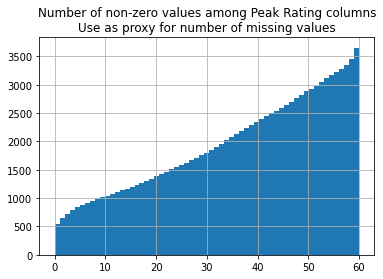

In [117]:
df['num_nonzero'] = df.loc[:, pr_sample_cols].isna().sum(axis=1)
df['num_nonzero'].hist(bins=61, cumulative=1)
plt.title('Number of non-zero values among Peak Rating columns\nUse as proxy for number of missing values')

In [118]:
df[df['num_nonzero'] > 10].shape  # Removing all peaks with <10 non-zeroes filters about 1k 

(2611, 150)

<AxesSubplot:>

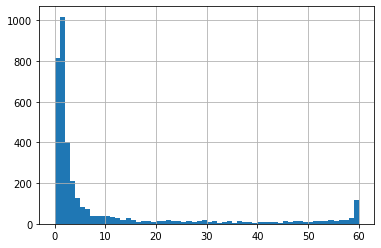

In [120]:
(df.loc[:, pr_sample_cols] > 3).sum(axis=1).hist(bins=60, )

In [121]:
df['num_pr_gt_2'] = (df.loc[:, pr_sample_cols] > 2).sum(axis=1)

In [82]:
df.loc[df['num_pr_gt_2'] > 5]

,Tags,Checked,Name,Formula,Annot. Source: Predicted Compositions,Annot. Source: mzCloud Search,Annot. Source: Metabolika Search,Annot. Source: ChemSpider Search,Annot. DeltaMass [ppm],Calc. MW,...,Peak Rating: 20210831_KAO_HILIC_T1101M_20210406_9wk_RBG.raw (F61),Peak Rating: 20210831_KAO_HILIC_T1101M_20210410_10wk_FBG.raw (F62),Peak Rating: 20210831_KAO_HILIC_T1101M_20210413_10wk_RBG.raw (F63),Peak Rating: 20210831_KAO_HILIC_T1102M_20210327_8wk_FBG.raw (F64),Peak Rating: 20210831_KAO_HILIC_T1102M_20210402_9wk_FBG.raw (F65),Peak Rating: 20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw (F66),Peak Rating: 20210831_KAO_HILIC_T1102M_20210410_10wk_FBG.raw (F67),Peak Rating: 20210831_KAO_HILIC_T1102M_20210413_10wk_RBG.raw (F68),num_nonzero,num_pr_gt_2
6,NaN,FALSE,Linoleic Acid,C18 H32 O2,Full match,Full match,Full match,Full match,-2.2,280.23961,...,8.4,9.5,9.5,10.0,8.9,9.5,8.4,7.8,0,60
194,NaN,FALSE,2-palmitoyl-sn-glycero-3-phosphocholine,C24 H50 N O7 P,Full match,No results,No results,Full match,0.09,495.33254,...,8.9,8.4,7.8,8.4,8.4,7.8,8.4,8.4,0,60
432,NaN,FALSE,trans-Petroselinic acid,C18 H34 O2,Full match,Full match,Partial match,Not the top hit,-2.4,282.2552,...,8.9,8.4,9.5,9.5,9.5,9.5,7.8,7.8,0,60
632,NaN,FALSE,Uric acid,C5 H4 N4 O3,No match,Invalid mass,No results,No results,-5.85,168.02736,...,9.5,8.4,8.4,NaN,8.9,7.8,8.9,8.4,12,47
805,NaN,FALSE,"(2R)-3-Hydroxy-2-[(9Z,12E)-9,12-octadecadienoy...",C26 H50 N O7 P,No results,No results,No results,Full match,0.34,519.33266,...,8.9,7.8,8.9,7.8,7.8,7.8,8.4,7.8,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140811,NaN,FALSE,NaN,C27 H28 N8 O3 P2 S,Full match,No results,No results,No results,3.55,606.15018,...,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,47,8
140856,NaN,FALSE,NaN,C32 H70 N6 P2,Full match,No results,No results,No results,-3.42,600.51167,...,0.3,0.0,NaN,0.3,0.0,7.4,0.3,0.0,20,7
140893,NaN,FALSE,NaN,C41 H83 N3 O4 S,Full match,No results,No results,No results,1.4,713.61143,...,6.8,0.3,7.4,NaN,NaN,NaN,0.3,NaN,40,9
140984,NaN,FALSE,NaN,C47 H74 O2,Full match,No results,No results,No results,-1.87,670.56763,...,6.8,0.3,6.8,NaN,0.3,0.3,0.0,0.3,11,6


In [101]:
float('nan') < 1.01

False

In [105]:
min_peak_rating = 2
num_cols = 5
filt = df.loc[(df[pr_sample_cols] > min_peak_rating).sum(axis=1) > num_cols]

In [108]:
filt['mean_pr'] = filt[pr_sample_cols].mean(axis=1)
filt['mean_pr']

C:\Users\bjanderson23\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


6         8.928333
194       8.220000
432       8.770000
632       8.477083
805       8.091667
            ...   
140811    4.676923
140856    1.385000
140893    3.435000
140984    1.059184
141297    3.071429
Name: mean_pr, Length: 1060, dtype: float64

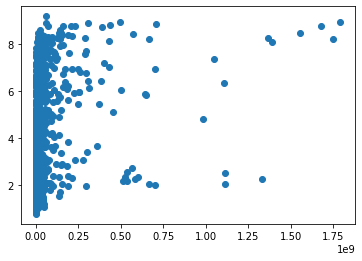

In [110]:
plt.scatter(filt['Area (Max.)'].astype('float'), filt['mean_pr'])

<AxesSubplot:>

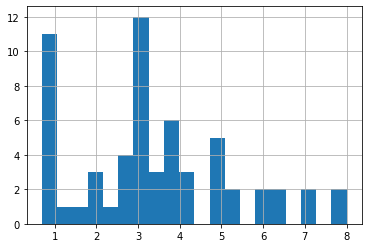

In [52]:
df[pr_sample_cols].iloc[2013].hist(bins=20)

In [34]:
from unidip import UniDip

# create bi-modal distribution
dat = np.concatenate([np.random.randn(200)-3, np.random.randn(200)+3])

# sort data so returned indices are meaningful
dat = np.msort(dat)

# get start and stop indices of peaks 
intervals = UniDip(dat).run()

In [35]:
intervals

[(11, 194), (216, 381)]